## Stroke Prediction Dataset Using Decision Trees

This dataset was downloaded from, Kaggle as a CSV file https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

This dataset contains 5,110 observations(rows) of patients. Each patient has a total of 12 attributes, or columns, providing various information such as age, gender, smoking status, and other diseases that can ultimately be used as a predictor for stroke. This dataset can be used for binary classification purposes. The target variable, or feature, is the stroke column, 0: did not have stroke, 1: had stroke.

Attribute Information

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

In [72]:
#import libraries needed
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import numpy as np

In [27]:
#load the stroke data into a pandas dataframe object
df = pd.read_csv("Datasets/healthcare-dataset-stroke-data.csv")

In [28]:
#display first five rows of the dataset
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [29]:
#drop ID column from dataframe since it plays no role in prediction
df.drop(columns=["id"], axis=1, inplace=True)

In [30]:
#display summary statistics on number columns
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [32]:
#Y is our target variable
y = df["stroke"]

In [33]:
#X is our attributes used for prediction
X = df.drop(columns=["stroke"], axis=1)

In [36]:
#encode categorical features such as(gender, ever_married, "work type", residence_type, smoking status) to numbers
X = pd.get_dummies(X, columns=["gender", "ever_married", "work_type", "Residence_type", "smoking_status"])

In [59]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5110 non-null   float64
 1   hypertension                    5110 non-null   int64  
 2   heart_disease                   5110 non-null   int64  
 3   avg_glucose_level               5110 non-null   float64
 4   bmi                             5110 non-null   float64
 5   gender_Female                   5110 non-null   uint8  
 6   gender_Male                     5110 non-null   uint8  
 7   gender_Other                    5110 non-null   uint8  
 8   ever_married_No                 5110 non-null   uint8  
 9   ever_married_Yes                5110 non-null   uint8  
 10  work_type_Govt_job              5110 non-null   uint8  
 11  work_type_Never_worked          5110 non-null   uint8  
 12  work_type_Private               51

In [60]:
#BMI column contains missing values(nan), impute with average BMI
avg_bmi_value = X["bmi"].mean()
X["bmi"].fillna(value=avg_bmi_value, inplace=True)

In [61]:
X["bmi"].isna().sum()

0

In [62]:
#split the dataset into random training and testing sets, 80% is used for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [63]:
X_train.shape

(4088, 21)

In [64]:
X_test.shape

(1022, 21)

In [65]:
y_train.shape

(4088,)

In [66]:
y_test.shape

(1022,)

In [67]:
#construct a DecisionTreeClassifier model and fit it to the training data
#by default, sklearn uses the gini coefficient instead of entropy for
#splitting features with most information gain(reduce uncertainty or randomness)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [69]:
#Test the fitted decision tree model on testing X
y_pred = dt.predict(X_test)

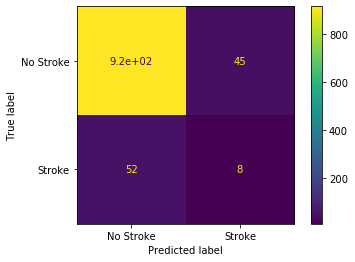

In [77]:
#Display a confusion matrix, leading diagnoal row are correct classification
plot_confusion_matrix(dt, X_test, y_test, display_labels=["No Stroke", "Stroke"])

In [76]:
y_test.value_counts()
#The decision tree performed very well when it comes to classifying (0) no stroke
#in the y_test, 962 were classified as no stroke, the model classified 922 as no stroke
#however the model performed badly when it came to classifying as stroke(1)
#in the y_test, 60 patients had stroke while model only classified 8 of these

0    962
1     60
Name: stroke, dtype: int64